This notebook is used to produce the plots appearing in Figure 7.A and several figures of the supporting information of artcile doi:10.1021/acs.jctc.4c00294 

# Modules

In [9]:
# Basics
import sys
import os
import numpy as np
import pandas as pd

# Visuals
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.pyplot import cm


# Specific to biomolecular simulations
import MDAnalysis as mda

# My functions
import functions as myfuncs

# Charge Datas

In [10]:
# Load the data
myPath = "../Examples/"
myName = "A_HairpinRibozyme_REST2_traj"

df = pd.read_csv(myPath + myName + ".csv")

In [11]:
Data_names = [
    "d_A-1:O2prime-G8:N1",
    "d_A-1:O2prime-A10:N6",
    "d_A-1:O2prime-A38:N6",
    "d_A-1:O2prime-G+1:O1P",
    "d_A-1:O2prime-G+1:O2P",
    "d_G+1:O1P-G8:N2",
    "d_G+1:O2P-G8:N2",
    "A-1_puckering_pseudorot",
    "IAA",
]

Long_names = [
    "A-1:O2' - G8:N1",
    "A-1:O2' - A10:N6",
    "A-1:O2' - A38:N6",
    "A-1:O2'- G+1:pro-Sp",
    "A-1:O2' - G+1:pro-Rp",
    "G+1:pro-Sp - G8:N2",
    "G+1:pro-Rp - G8:N2",
    "A-1 pseudo-rotation (°)",
    "IAA (°)",
]

# Generate Ordered H-Bonds


Performing the analysis of the trajectory over the time range   300000  to   672600.0 ps
Analysis complete: found 781 unique combinations
Shannon entropy: 7.2055 bits
Showed : 60.15834675254965 % ; Unshowed : 39.84165324745035 %


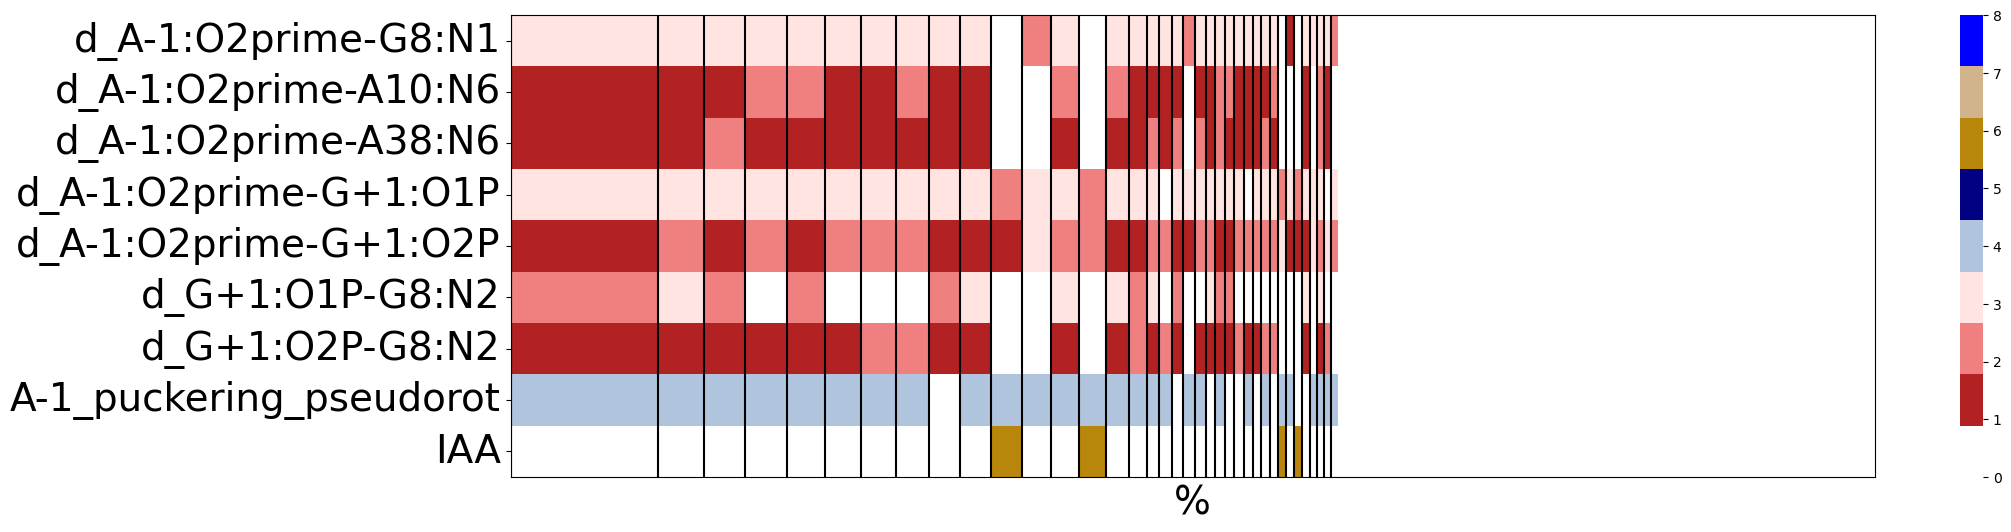

In [12]:
custom_colors = [
    "white",
    "firebrick",
    "lightcoral",
    "mistyrose",
    "lightsteelblue",
    "navy",
    "darkgoldenrod",
    "tan",
]
custom_cmap = ListedColormap(custom_colors)

start_time = 300000  # ps
end_time = 0  # ps


time = df["Time"]
step = int(time[1])
start_frame = int(start_time / step)
if end_time != 0:
    end_frame = int(end_time / step)
else:
    end_frame = len(time) - 1
print(
    "Performing the analysis of the trajectory over the time range  ",
    str(start_time),
    " to  ",
    str(time[end_frame]),
    "ps",
)

dataArray = []
for d in range(len(Data_names)):
    data_values = df[Data_names[d]].values
    dataArray.append(data_values[start_frame:end_frame])

Emptyarray = myfuncs.categorize_data_array(dataArray, Data_names)
nbOfFrames, nbdatas = np.shape(Emptyarray)

Combinaisons = myfuncs.cluster_data_combinations(Emptyarray)

df_plot = pd.DataFrame(np.array(Combinaisons), columns=["Indexes", "Counts", "Frames"])
entropy = myfuncs.calculate_distribution_entropy(df_plot, nbOfFrames)
df_plot = df_plot.sort_values("Counts", ascending=False)
ColoredFP_df_tr, Xaxes, K = myfuncs.generate_colored_dataframe(
    df_plot, Data_names, nbOfFrames, cutoff=0.005
)


f, ax = plt.subplots(figsize=(22, 6))
mask = np.triu(np.ones_like(ColoredFP_df_tr, dtype=bool))
custom_colors = [
    "white",
    "firebrick",
    "lightcoral",
    "mistyrose",
    "lightsteelblue",
    "navy",
    "darkgoldenrod",
    "tan",
    "b",
]
custom_cmap = ListedColormap(custom_colors)
cmap = sns.color_palette("cubehelix_r", as_cmap=True)
sns.heatmap(ColoredFP_df_tr, cmap=custom_cmap, vmin=0, vmax=8)
mask = np.triu(np.ones_like(ColoredFP_df_tr, dtype=bool))

for ca in Xaxes:
    ax.axvline(x=ca, color="black")

# Ajouter un cadre en ajustant les limites des axes
ax.spines["top"].set_visible(True)
ax.spines["bottom"].set_visible(True)
ax.spines["right"].set_visible(True)
ax.spines["left"].set_visible(True)


# Réglez les nouvelles étiquettes des xticks et leurs positions
ticks = []
labels = []
Showed = 0
for t in range(1, K):
    ticks.append(((Xaxes[t] - Xaxes[t - 1]) / 2 + Xaxes[t - 1]))
    labels.append(round((Xaxes[t] - Xaxes[t - 1]) / nbOfFrames * 100, 1))
    Showed += (Xaxes[t] - Xaxes[t - 1]) / nbOfFrames * 100


print("Showed :", str(Showed), "%", "; Unshowed :", str(100 - Showed), "%")
# ax.set_xticks(ticks)
# ax.set_xticklabels(labels, fontsize=18, rotation=45)
ax.set_xticks([])
ax.set_xticklabels([])

ax.tick_params(axis="y", labelsize=28)

x_axis_label_text = "%"  # Replace with your desired label text

# Set the x-axis label
ax.set_xlabel(x_axis_label_text, fontsize=28)

# Customize the rotation of the x-axis label if needed
ax.xaxis.set_label_coords(0.5, -0.015)  # Adjust the coordinates for positioning

plt.savefig(
    myPath
    + myName
    + "_ORDERED_Hbondfingerprints_"
    + str(start_frame)
    + "-"
    + str(end_frame)
    + ".png",
    dpi=300,
    bbox_inches="tight",
)
plt.show()